Input: data file in long format. Averages em_fraction for each site along all available dates

Run (#3) after calcVegAreaFromPts.py

TODO:
* Remove outliers? Or use quantiles instead of min/max?

In [1]:
import pandas as pd

In [2]:
csv_in='/mnt/f/PAD2019/Chemistry/em_fraction_csv/ABoVE_Lakes_all_em_fraction_v2_mosaic_or_single.csv'
csv_out_pth='/mnt/f/PAD2019/Chemistry/em_fraction_csv/ABoVE_Lakes_all_em_fraction_average_v2.csv'
csv=pd.read_csv(csv_in)
del csv['index_right']
del csv['label']
del csv['Unnamed: 0']

csv.head()

,site,date,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id,scene_name
0,Roche Pond,wc.sh,58.8330,-111.2830,0.511015,91219.12011,2597.406167,170613,PAD_170613_mosaic_cls_wc.sh
1,Dore Lake,wc.sh,58.7904,-111.0500,NaN,NaN,NaN,170613,PAD_170613_mosaic_cls_wc.sh
2,Little Lake,wc.sh,58.7364,-111.1220,NaN,NaN,NaN,170613,PAD_170613_mosaic_cls_wc.sh
3,Roberts Cabin Pond,wc.sh,58.8057,-111.2430,0.272269,179601.18770,2930.398492,170613,PAD_170613_mosaic_cls_wc.sh
4,Flett Lake,wc.sh,58.9539,-111.0783,NaN,NaN,NaN,170613,PAD_170613_mosaic_cls_wc.sh


In [3]:
# remove duplicates
len_before=len(csv)
# csv.drop_duplicates(['site', 'area_px_m2', 'perimeter_'], inplace=True) # 'site', 'date','scene_id'
len_after=len(csv)
print(f'Removed {len_before-len_after} duplicates')

Removed 0 duplicates


In [4]:
#example view
csv[csv.site=='Balloon Lake']

,site,date,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id,scene_name
14,Balloon Lake,wc.sh,58.8775,-111.2264,0.752163,969996.1467,22818.696800,170613,PAD_170613_mosaic_cls_wc.sh
60,Balloon Lake,wc.sh,58.8775,-111.2264,0.498645,290876.2767,10304.228060,170908,PAD_170908_mosaic_cls_wc.sh
106,Balloon Lake,wc.sh,58.8775,-111.2264,0.518308,243199.5467,6945.401919,180821,PAD_180821_mosaic_cls_wc.sh
152,Balloon Lake,180822,58.8775,-111.2264,NaN,NaN,NaN,16008,bakerc_16008_18048_011_180822_L090_CX_02
198,Balloon Lake,190905,58.8775,-111.2264,NaN,NaN,NaN,16008,bakerc_16008_19060_037_190905_L090_CX_01
244,Balloon Lake,170614,58.8775,-111.2264,NaN,NaN,NaN,21405,daring_21405_17063_010_170614_L090_CX_01_LUT-F...
290,Balloon Lake,170909,58.8775,-111.2264,NaN,NaN,NaN,21405,daring_21405_17094_010_170909_L090_CX_01_LUT-F...
336,Balloon Lake,wc.sh,58.8775,-111.2264,NaN,NaN,NaN,170621,YFLATS_170621_mosaic_cls_wc.sh
382,Balloon Lake,wc.sh,58.8775,-111.2264,NaN,NaN,NaN,170916,YFLATS_170916_mosaic_cls_wc.sh
428,Balloon Lake,wc.sh,58.8775,-111.2264,NaN,NaN,NaN,180827,YFLATS_180827_mosaic_cls_wc.sh


In [5]:
# show number of obs
csv_count=csv[csv['em_fractio']>0][['em_fractio', 'site']].groupby('site').count()
csv_count

,em_fractio
site,
12mile,4
9Mile,4
Balloon Lake,3
Balloon Lake #1,3
Blanche,3
Canvasback,2
Chillowes Lake,3
Daring Lake,2
Daring Lake 4,2


In [6]:
# show means
csv.groupby('site').mean()

,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id
site,,,,,,
12mile,66.4497,-145.5460,0.254476,3.706729e+06,4.461645e+04,119131.454545
9Mile,66.1858,-146.6609,0.035281,3.085702e+06,1.236837e+04,119131.454545
Balloon Lake,58.8775,-111.2264,0.589706,5.013573e+05,1.335611e+04,119131.454545
Balloon Lake #1,58.8786,-111.2527,0.273967,9.429135e+05,2.141867e+04,119131.454545
Big Beaver,58.7615,-111.0733,NaN,NaN,NaN,119131.454545
Blanche,58.3922,-111.2790,0.314955,1.882951e+07,4.263762e+05,119131.454545
Canvasback,66.3833,-146.3553,0.374368,3.573079e+06,6.141466e+04,119131.454545
Chillowes Lake,58.8143,-111.3587,0.642255,5.217688e+05,1.576170e+04,119131.454545
Daring Lake,64.8651,-111.5929,0.003665,1.380393e+07,7.575412e+04,119131.454545


In [7]:
# show other stats
dir(csv.groupby('site'))
csv.groupby('site').describe()
# csv[['site', 'em_fractio']].groupby('site').describe() # view all stats
csv_min=csv[['site', 'em_fractio']].groupby('site').describe().em_fractio['min']
csv_max=csv[['site', 'em_fractio']].groupby('site').describe().em_fractio['max']

csv_range=csv[['site', 'em_fractio']].groupby('site').describe().em_fractio['max'] - csv[['site', 'em_fractio']].groupby('site').describe().em_fractio['min'] # view just diff
csv_range

site
12mile                  0.040050
9Mile                   0.022000
Balloon Lake            0.253518
Balloon Lake #1         0.100310
Big Beaver                   NaN
Blanche                 0.457477
Canvasback              0.098972
Chillowes Lake          0.137589
Daring Lake             0.000793
Daring Lake 4           0.028162
Dore Lake                    NaN
Egg Lake                0.371474
Emberras Pond                NaN
Flett Lake                   NaN
Green Star Lake         0.021415
Horseshoe               0.222939
Lake 10                      NaN
Lake Kakawi             0.001383
Lake M2                      NaN
Limon Lake              0.372194
Little Beaver                NaN
Little Lake                  NaN
PAD3                    0.182246
Rat Lake                0.583614
Roberts Cabin Pond      0.071207
Roche Pond              0.251559
Swan's Fly Farm Pond    0.121948
Third Lake                   NaN
abraham                 0.003387
boot                         NaN
buddy

In [8]:
csv_out=csv.groupby('site').mean().copy()
csv_out['em_fraction']=csv.groupby('site').mean().em_fractio
csv_out

,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id,em_fraction
site,,,,,,,
12mile,66.4497,-145.5460,0.254476,3.706729e+06,4.461645e+04,119131.454545,0.254476
9Mile,66.1858,-146.6609,0.035281,3.085702e+06,1.236837e+04,119131.454545,0.035281
Balloon Lake,58.8775,-111.2264,0.589706,5.013573e+05,1.335611e+04,119131.454545,0.589706
Balloon Lake #1,58.8786,-111.2527,0.273967,9.429135e+05,2.141867e+04,119131.454545,0.273967
Big Beaver,58.7615,-111.0733,NaN,NaN,NaN,119131.454545,NaN
Blanche,58.3922,-111.2790,0.314955,1.882951e+07,4.263762e+05,119131.454545,0.314955
Canvasback,66.3833,-146.3553,0.374368,3.573079e+06,6.141466e+04,119131.454545,0.374368
Chillowes Lake,58.8143,-111.3587,0.642255,5.217688e+05,1.576170e+04,119131.454545,0.642255
Daring Lake,64.8651,-111.5929,0.003665,1.380393e+07,7.575412e+04,119131.454545,0.003665


In [9]:
# del csv_out['date'], csv_out['em_fractio'] #,csv_out['scene_name'], csv_out['scene_id']
del csv_out['em_fractio'] #,csv_out['scene_name'], csv_out['scene_id']
del csv_out['scene_id']

In [10]:
csv_out.rename({'perimeter_':'perimeter_px_m2'}, axis='columns', errors='raise', inplace=True)
# csv_out.head()

In [11]:
# add uncertainty
csv_out['em_frac_range']=csv_range
csv_out['em_frac_min']=csv_min
csv_out['em_frac_max']=csv_max
csv_out['num_observations']=csv_count.astype(int)
csv_out

,Latitude_dd,Longitude_dd,area_px_m2,perimeter_px_m2,em_fraction,em_frac_range,em_frac_min,em_frac_max,num_observations
site,,,,,,,,,
12mile,66.4497,-145.5460,3.706729e+06,4.461645e+04,0.254476,0.040050,0.232360,0.272411,4.0
9Mile,66.1858,-146.6609,3.085702e+06,1.236837e+04,0.035281,0.022000,0.024449,0.046449,4.0
Balloon Lake,58.8775,-111.2264,5.013573e+05,1.335611e+04,0.589706,0.253518,0.498645,0.752163,3.0
Balloon Lake #1,58.8786,-111.2527,9.429135e+05,2.141867e+04,0.273967,0.100310,0.231093,0.331403,3.0
Big Beaver,58.7615,-111.0733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blanche,58.3922,-111.2790,1.882951e+07,4.263762e+05,0.314955,0.457477,0.127071,0.584548,3.0
Canvasback,66.3833,-146.3553,3.573079e+06,6.141466e+04,0.374368,0.098972,0.324882,0.423854,2.0
Chillowes Lake,58.8143,-111.3587,5.217688e+05,1.576170e+04,0.642255,0.137589,0.555217,0.692806,3.0
Daring Lake,64.8651,-111.5929,1.380393e+07,7.575412e+04,0.003665,0.000793,0.003268,0.004062,2.0


In [12]:
csv_out.to_csv(csv_out_pth)

# Visualization

In [13]:
csv_out.mean()

Latitude_dd         6.278725e+01
Longitude_dd       -1.274519e+02
area_px_m2          1.185994e+07
perimeter_px_m2     1.896125e+05
em_fraction         2.401136e-01
em_frac_range       1.743835e-01
em_frac_min         1.663347e-01
em_frac_max         3.407182e-01
num_observations    3.000000e+00
dtype: float64

In [14]:
csv.groupby('site').mean()

,Latitude_dd,Longitude_dd,em_fractio,area_px_m2,perimeter_,scene_id
site,,,,,,
12mile,66.4497,-145.5460,0.254476,3.706729e+06,4.461645e+04,119131.454545
9Mile,66.1858,-146.6609,0.035281,3.085702e+06,1.236837e+04,119131.454545
Balloon Lake,58.8775,-111.2264,0.589706,5.013573e+05,1.335611e+04,119131.454545
Balloon Lake #1,58.8786,-111.2527,0.273967,9.429135e+05,2.141867e+04,119131.454545
Big Beaver,58.7615,-111.0733,NaN,NaN,NaN,119131.454545
Blanche,58.3922,-111.2790,0.314955,1.882951e+07,4.263762e+05,119131.454545
Canvasback,66.3833,-146.3553,0.374368,3.573079e+06,6.141466e+04,119131.454545
Chillowes Lake,58.8143,-111.3587,0.642255,5.217688e+05,1.576170e+04,119131.454545
Daring Lake,64.8651,-111.5929,0.003665,1.380393e+07,7.575412e+04,119131.454545


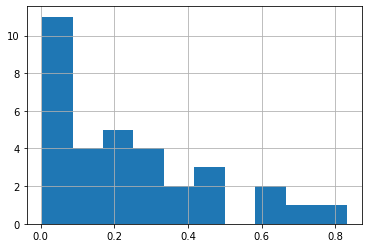

In [15]:
csv_out.em_fraction.hist()